![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

# ANALISIS Y EXPLORACION DE DATOS

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_excel(r'\Users\USER\Documents\Cesar\Multimedia\Programacion\Data_science_Henry\HENRY\Modulo 6\Proyecto_Integrador\Propuesta 1\BBDD_Hospitalización.xlsx')
df

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [6]:
columns_types = df.dtypes
print(columns_types)

EDAD                                                                         float64
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

# EVALUACION DE DATOS NULOS EN EL DF

In [7]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
31,63.0,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
99,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
100,74.0,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
106,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
109,61.0,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [8]:
df_mod= df.dropna(subset=['PSA','EDAD'])
df_mod

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

# Eliminacion de filas con nulos ya que muchos de ellos estaban en columnas que no aportan al predictivo

In [9]:
df2=df_mod.dropna()
df2

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
561,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
562,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
563,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


# PARAMETRIZACION DE VALOR "NO" A 0

In [10]:
df2['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df2['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0)

C:\Users\USER\AppData\Local\Temp\ipykernel_2736\210276737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df2['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0)


In [11]:
df2.isnull().sum()

EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

In [12]:
df2 = df2.astype({
    'EDAD': 'Int64',
    'NUMERO DE MUESTRAS TOMADAS': 'Int64',
    'DIAS HOSPITALIZACION MQ':'Int64',
    'DIAS HOSPITALIZACIÓN UPC':'Int64',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'Int64'    
})

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 564
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       541 non-null    Int64  
 1   DIABETES                                                                   541 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 541 non-null    object 
 3   PSA                                                                        541 non-null    float64
 4   BIOPSIAS PREVIAS                                                           541 non-null    object 
 5   VOLUMEN PROSTATICO                                                         541 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [14]:
df2

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57,NO,NO,4.8,NO,NO,OTROS,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
561,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
562,78,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
563,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df2.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,63.879852,13.391257,12.987061,0.134935,0.168207,0.014787
std,9.389434,15.946475,3.942858,0.759080,0.973437,0.201300
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


# VERIFICACION DE FRECUENCIAS CON HISTOGRAMOS (AUNQUE NO SIGNIFICATIVO)

In [17]:
# Plot histograms for numerical columns
# df.hist(column=['EDAD','PSA','NUMERO DE MUESTRAS TOMADAS','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], bins=10, figsize=(10, 5))
# plt.show()

# DIAGRAMAS PARA DETECCION DE OUTLIERS

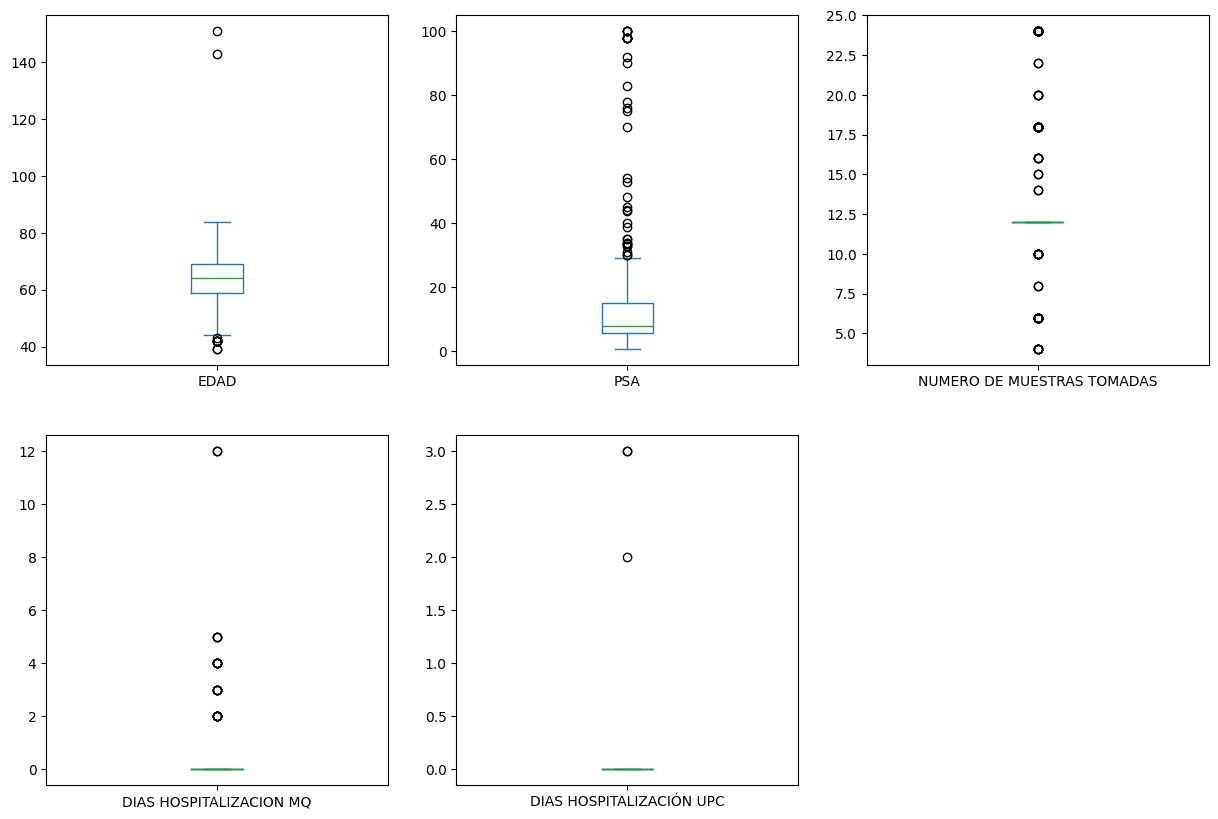

In [18]:
# Plot box plots for numerical columns
df[['EDAD','PSA','NUMERO DE MUESTRAS TOMADAS','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10))
plt.show()

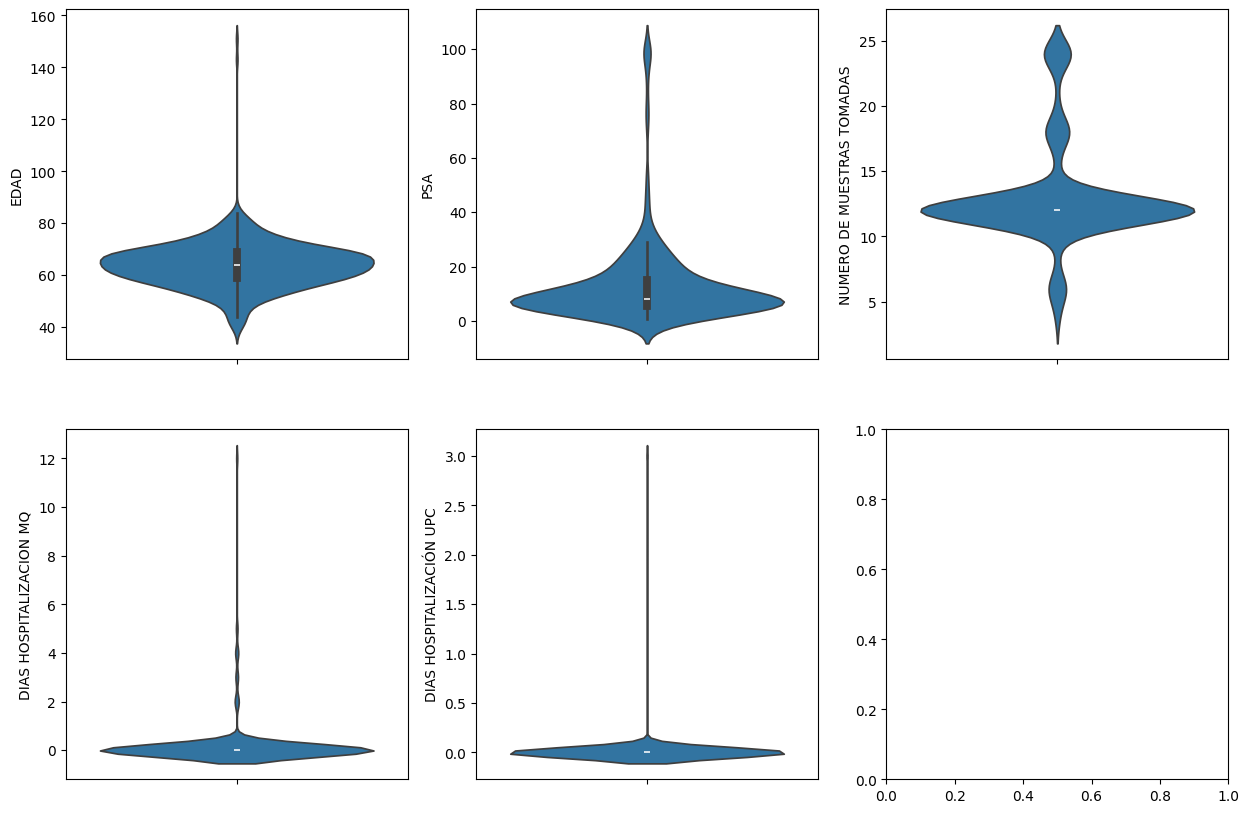

In [19]:
# Plot violin plots for numerical columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.violinplot(data=df['EDAD'], ax=axes[0, 0])
sns.violinplot(data=df['PSA'], ax=axes[0, 1])
sns.violinplot(data=df['NUMERO DE MUESTRAS TOMADAS'], ax=axes[0, 2])
sns.violinplot(data=df['DIAS HOSPITALIZACION MQ'], ax=axes[1, 0])
sns.violinplot(data=df['DIAS HOSPITALIZACIÓN UPC'], ax=axes[1, 1])
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

# ELIMINACION DE PACIENTES CON EDADES MAYOR A 100 ANHIOS - OUTLIERS

In [20]:
# Personas mayores de 120 años en el estudio
df3=df2[df2['EDAD']<100]
df3

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57,NO,NO,4.8,NO,NO,OTROS,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
561,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
562,78,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
563,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


# EXPORTACION DEL DATASET FINAL PARA ENTRAR EN MODELAMIENTO

In [21]:
output_file_path='C:\\Users\\USER\\Documents\\Cesar\\Multimedia\\Programacion\\Data_science_Henry\\HENRY\\Modulo 6\\Hospital_output.xlsx'
df3.to_excel(output_file_path,index=False)

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

# ANALASIS DE VARIABLES CATEGORICAS PARA DETERMINAR IMPORTANCIA

In [22]:
categorical_columns = df3.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS',
       'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
       'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA',
       'HOSPITALIZACION'],
      dtype='object')


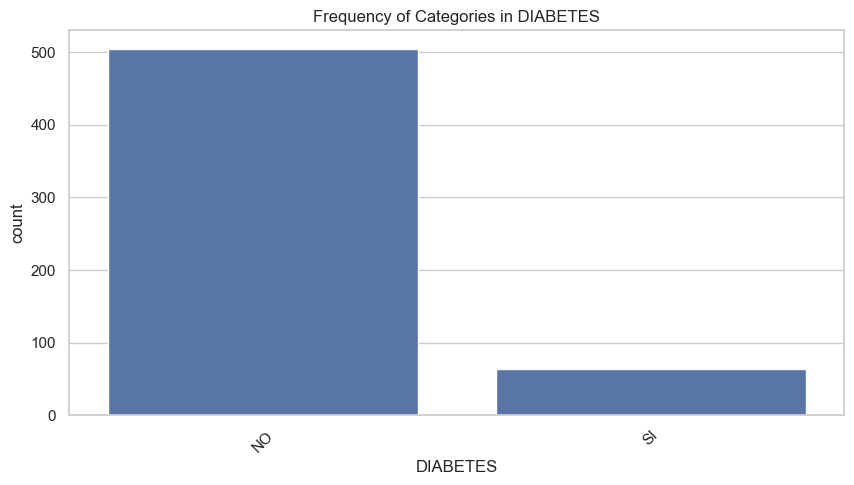

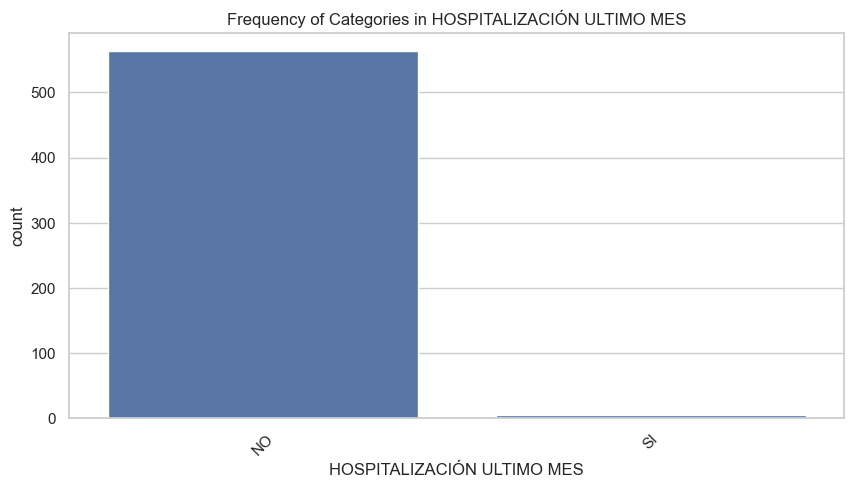

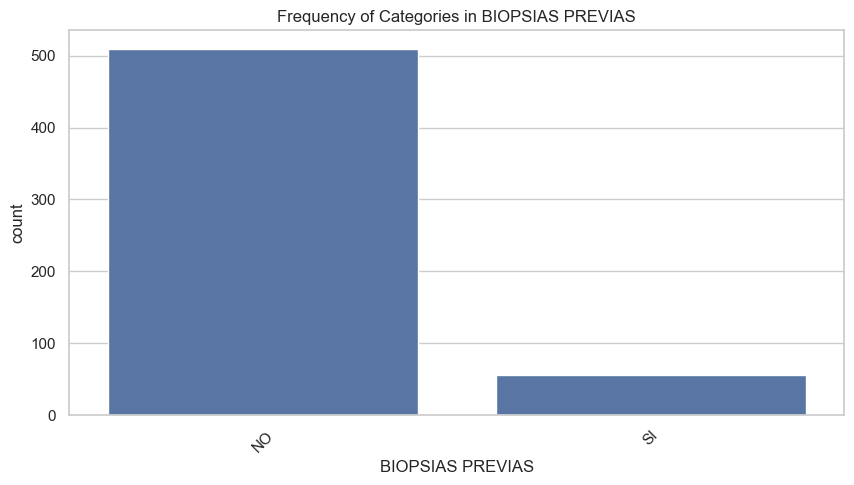

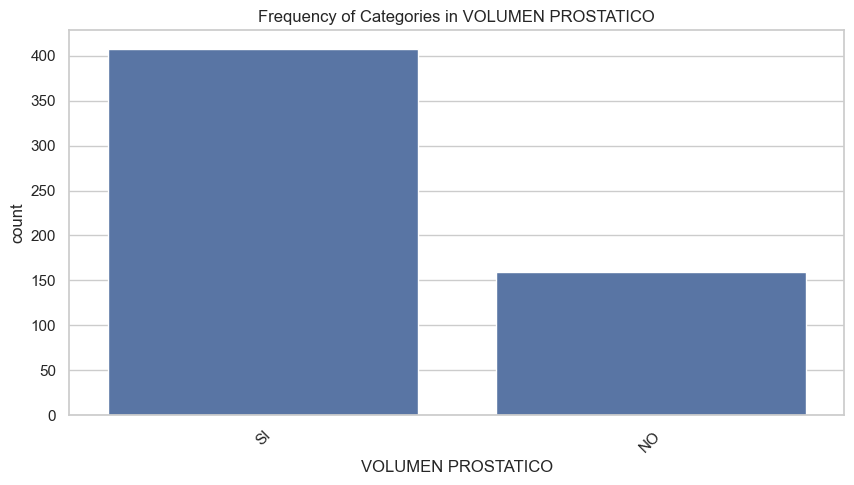

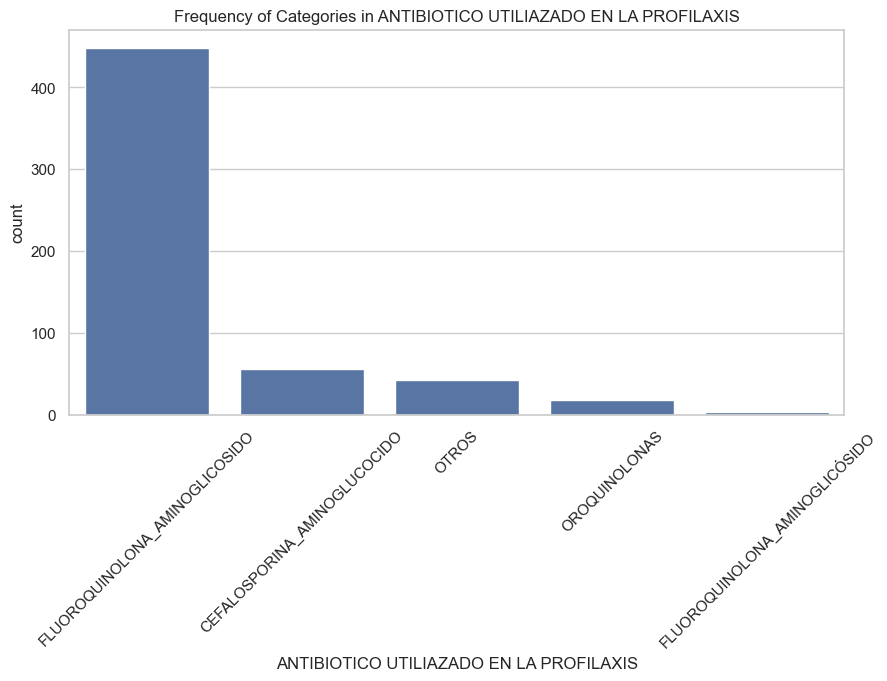

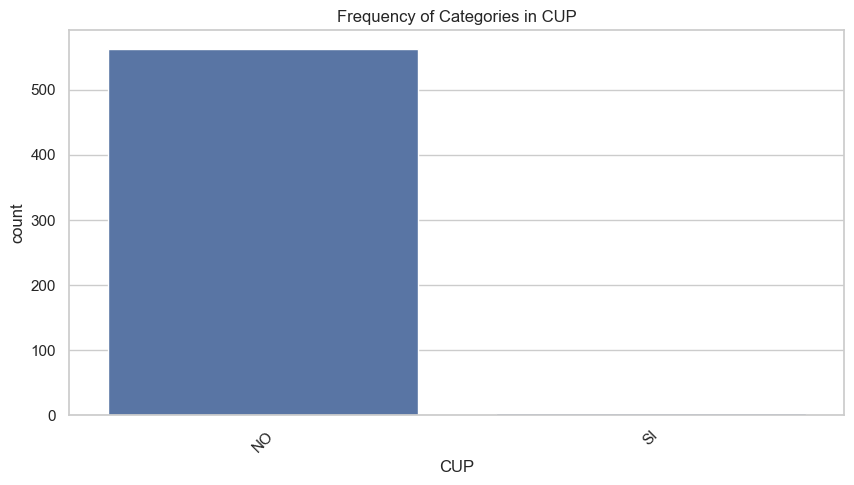

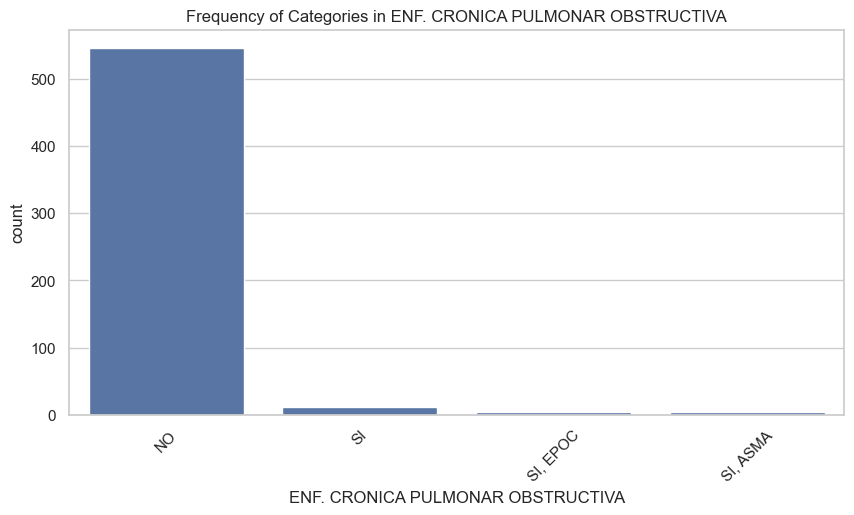

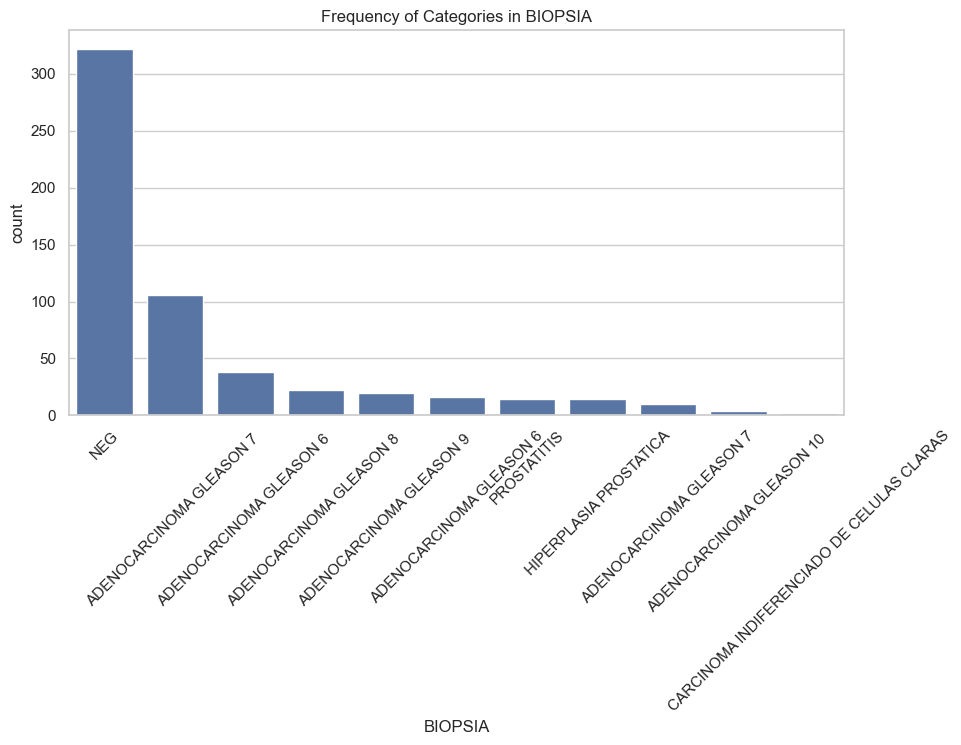

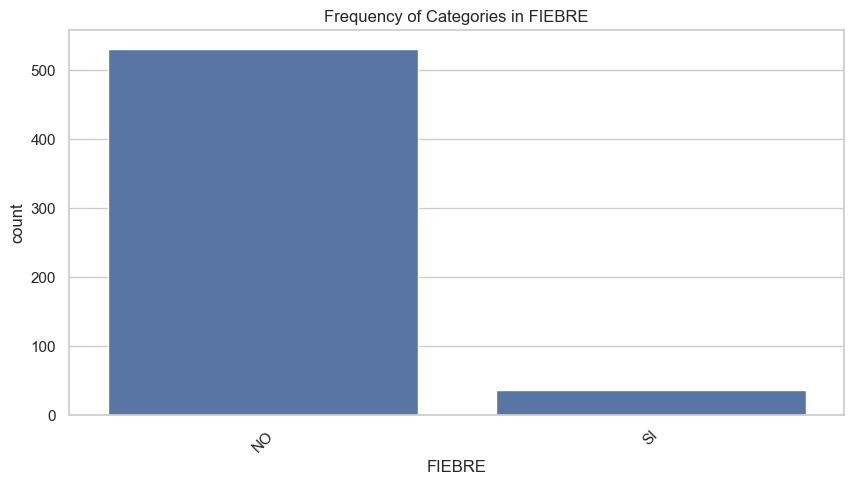

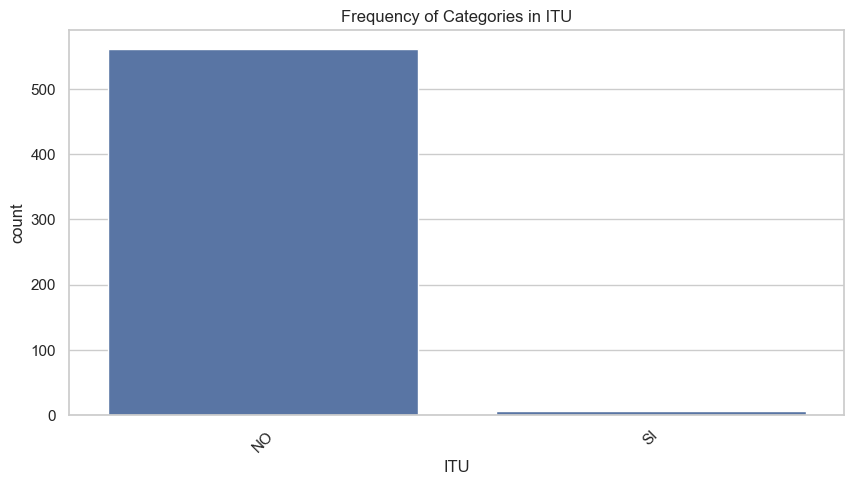

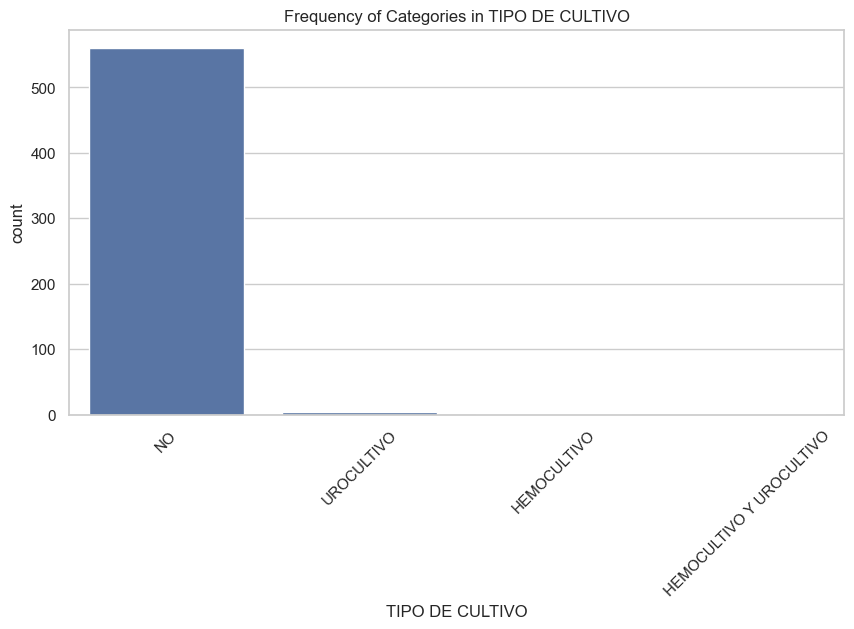

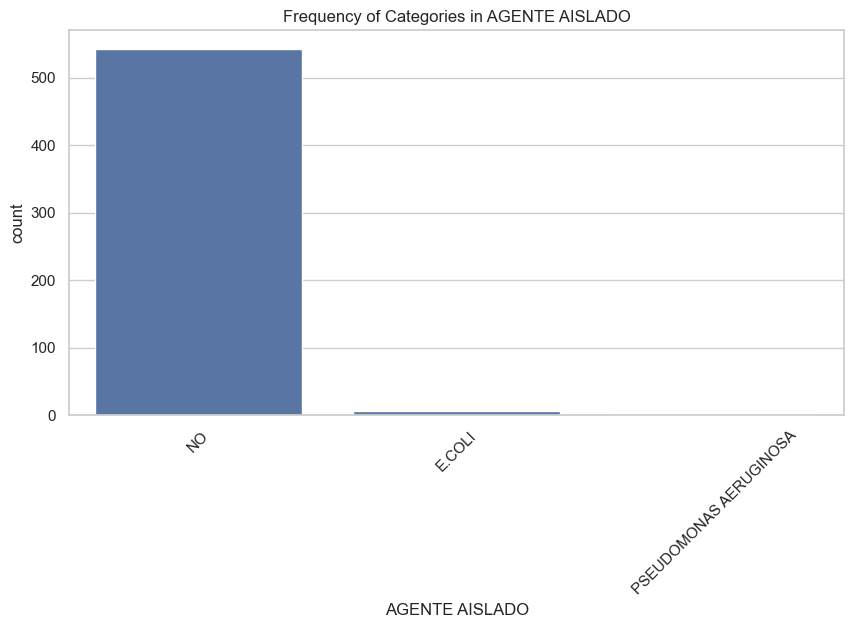

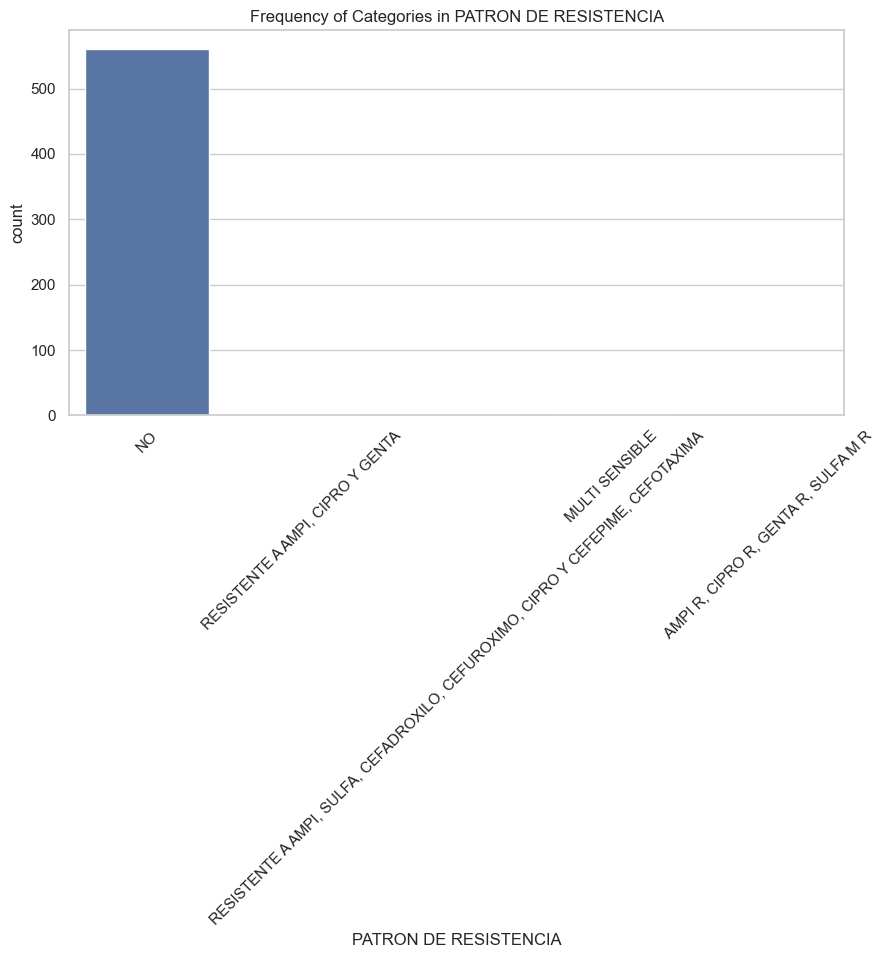

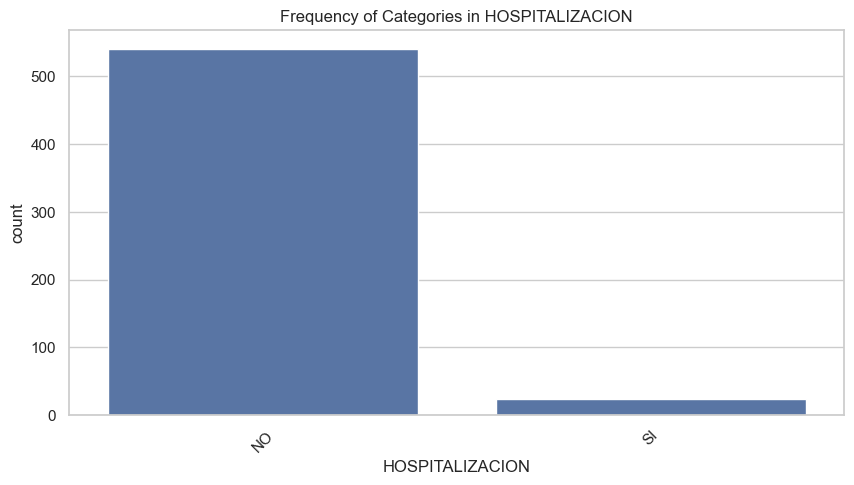

In [23]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Frequency of Categories in {column}')
    plt.xticks(rotation=45)
    plt.show()

# 3. MODELAMIENTO

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.

In [27]:
df= pd.read_excel('./Hospital_output.xlsx')
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,57,NO,NO,4.8,NO,NO,OTROS,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
535,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
536,78,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
537,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


# EVALUACION DE BALANCE DE DATOS CATEGORICOS (TARGET)

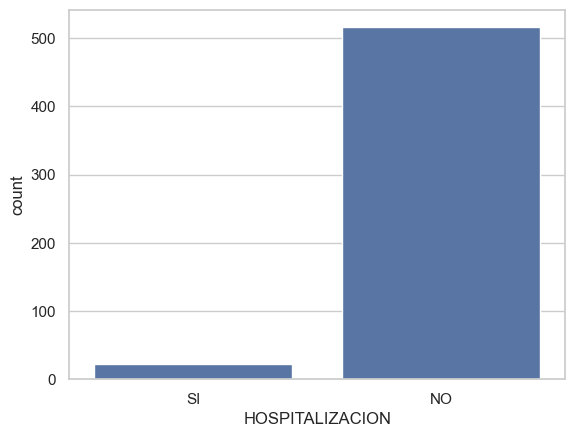

In [28]:
sns.countplot(x='HOSPITALIZACION',data=df)
plt.show()

# LIBRERIA PARA OVERSAMPLING

In [29]:
from imblearn.over_sampling import SMOTE

# ELIMINACION DE OTRAS COLUMNAS QUE NO TIENEN IMPACTO EN MODELO

In [30]:
df= df.drop(columns=['DIABETES','BIOPSIAS PREVIAS','HOSPITALIZACIÓN ULTIMO MES','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','NUMERO DE MUESTRAS TOMADAS','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC'])

In [31]:
df

,EDAD,PSA,VOLUMEN PROSTATICO,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,4.0,SI,NEG,1,SI,NO,NO,NO,NO,SI
1,56,7.7,SI,NEG,1,SI,NO,NO,NO,NO,SI
2,57,29.0,SI,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56,7.0,SI,NEG,1,SI,NO,NO,NO,NO,SI
4,55,29.0,SI,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...
534,57,4.8,NO,NEG,0,NO,NO,NO,NO,NO,NO
535,75,75.0,SI,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO
536,78,9.3,SI,NEG,0,NO,NO,NO,NO,NO,NO
537,67,6.0,SI,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO


# ARREGLO PREVIO A MATRIZ DE CORRELACION

In [32]:
df['TIPO DE CULTIVO'].unique()

array(['NO', 'HEMOCULTIVO', 'UROCULTIVO', 'HEMOCULTIVO Y UROCULTIVO'],
      dtype=object)

In [33]:
df['BIOPSIA'].unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
       'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ',
       'PROSTATITIS', 'ADENOCARCINOMA GLEASON 7',
       'HIPERPLASIA PROSTATICA',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'], dtype=object)

In [34]:
df['BIOPSIA'] = df['BIOPSIA'].replace({'NEG':0,'PROSTATITIS':0,'HIPERPLASIA PROSTATICA':0,
                                       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS':1,
                                       'ADENOCARCINOMA GLEASON 6 ':1,'ADENOCARCINOMA GLEASON 6':1,'ADENOCARCINOMA GLEASON 7 ':1,
                                       'ADENOCARCINOMA GLEASON 7':1,'ADENOCARCINOMA GLEASON 8 ':1,'ADENOCARCINOMA GLEASON 9 ':1,
                                       'ADENOCARCINOMA GLEASON 10 ':1 })

In [35]:
df['BIOPSIA'].unique()

array([0, 1], dtype=int64)

In [36]:
df['FIEBRE']=df['FIEBRE'].replace({'NO':0, 'SI':1})
df['ITU']=df['ITU'].replace({'NO':0, 'SI':1})

df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].replace({'NO':0, 'SI':1})

df['HOSPITALIZACION'] = df['HOSPITALIZACION'].replace({'NO': 0, 'SI': 1})

In [37]:
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].replace({'NO':0, 'SI':1}).astype('category')

# MATRIZ DE CORRELACION 

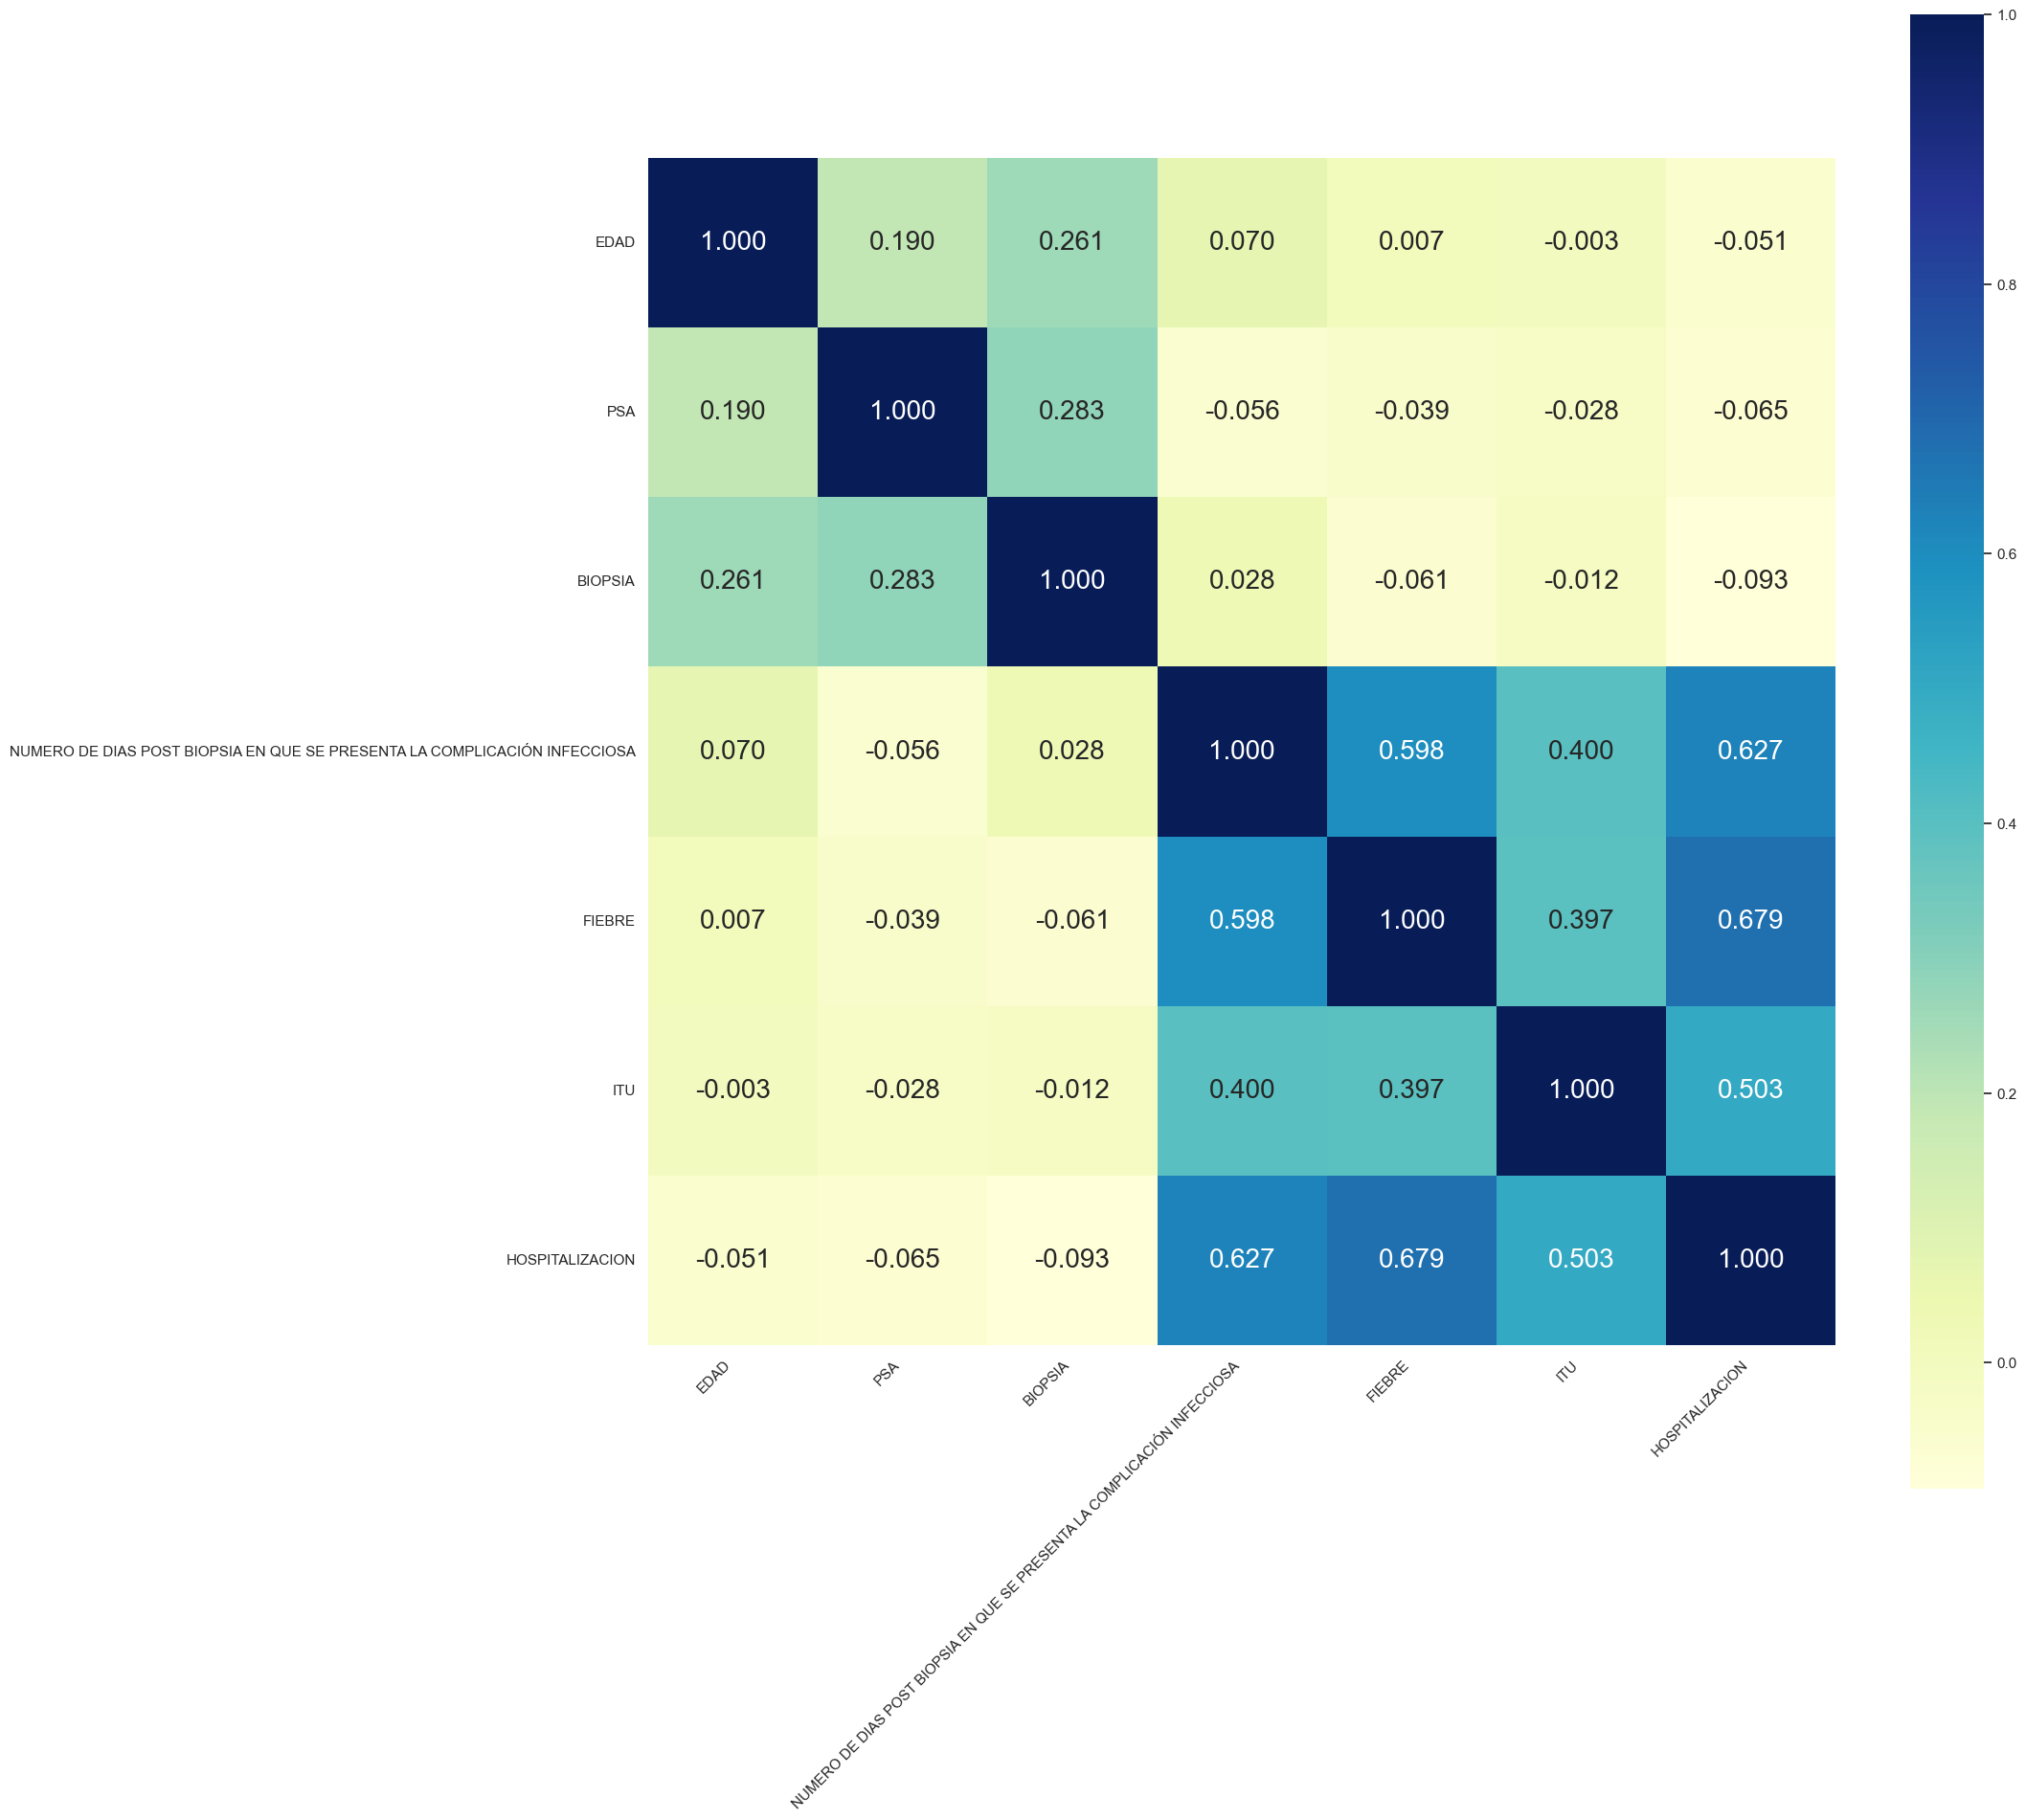

In [38]:
fig = plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 20  }, cbar=True, square=True, fmt='.3f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

# VARIABLES DUMMIES

In [39]:
df=pd.get_dummies(df,dtype='int')
df

,EDAD,PSA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACION,VOLUMEN PROSTATICO_0,VOLUMEN PROSTATICO_1,TIPO DE CULTIVO_HEMOCULTIVO,...,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,53,4.0,0,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,56,7.7,0,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,57,29.0,0,1,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,56,7.0,0,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4,55,29.0,0,1,1,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,57,4.8,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
535,75,75.0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
536,78,9.3,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
537,67,6.0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


# SEPARACION DEL DATASET EN X y TARGET (Y)

In [40]:
x=df[['EDAD','BIOPSIA','FIEBRE']] # 'FIEBRE',"NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"
y=df['HOSPITALIZACION']

In [41]:
df['HOSPITALIZACION'].unique()

array([1, 0], dtype=int64)

# OVERSAMPLING PARA SI --> 1

In [42]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [43]:
y.value_counts()

1    516
0    516
Name: HOSPITALIZACION, dtype: int64

# SEPARACION EN x,y _TRAIN AND x,y _TEST

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [46]:
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((825, 3), (207, 3), (825,), (207,))

# DECISION TREE CLASSIFIER - mejor profundidad 2

In [47]:
#from sklearn.neighbors import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Instanciamos el modelo clasificador

#classifier = DecisionTreeClassifier
classifier =DecisionTreeClassifier(max_depth=2, random_state=0,criterion='gini')

In [48]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento

classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [49]:
y_train_pred = classifier.predict(X_train) 

y_test_pred = classifier.predict(X_test) 

In [59]:
from sklearn.metrics import confusion_matrix

In [57]:
matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

# MATRIZ DE CONFUSION

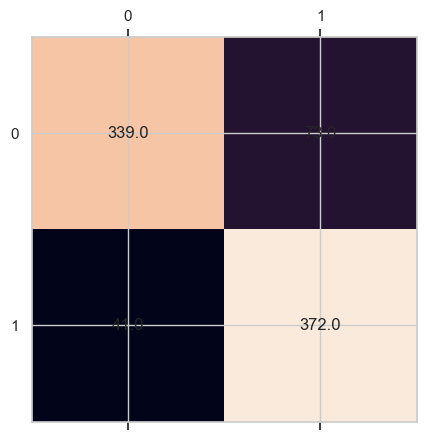

In [60]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

# REPORTE DE ANALISIS :  BUENA PRECISION Y ACCURACY, MODELO ACCEPTABLE

In [61]:
import seaborn as sns
from sklearn.metrics import  classification_report

print(classification_report(y_test, y_test_pred))

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       104
           1       0.81      0.92      0.86       103

    accuracy                           0.85       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.85      0.85       207

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       412
           1       0.84      0.90      0.87       413

    accuracy                           0.86       825
   macro avg       0.86      0.86      0.86       825
weighted avg       0.86      0.86      0.86       825



# IDENTIFICAION DE VARIABLES MAS RELEVANTES :
  Fibre, biopsia y EDAD

In [62]:
importances = classifier.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.854970)
2. feature 0 (0.145030)
3. feature 1 (0.000000)


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [25]:
# Si, las columnas que dejaria para el analisis seria volumen prostatico, frecuencia fiebre, hospitalizacion y diabetis

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 